# 25. Ameliah Utary - 220907501039

# UTS

## Import library yang dibutuhkan

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

## Load data dan membuat model regresi linier

In [13]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/ameliyyh/Praktik-pemrograman/main/ameliah.csv')

# Memisahkan variabel independen (X1, X2) dan variabel dependen (Y)
X = df[['X1', 'X2']]
Y = df['Y']

# Algoritma Regresi
# Membuat model regresi linier
regression_model = LinearRegression()
regression_model.fit(X, Y)

# Menampilkan koefisien dan intercept dari model
print("Koefisien: ", regression_model.coef_)
print("Intercept: ", regression_model.intercept_)

Koefisien:  [0.45311432 0.17698352]
Intercept:  35.715949580388525


Y = β0 + β1 X1 + β2 X2
#### Y = 35,716 + 0,453X1 + 0,177X2

##### Y (Variabel Dependen)
    Y adalah variabel yang ingin kita prediksi atau menjelaskan. Pada model regresi linear ini, Y mewakili hasil atau data yang ingin kita pahami atau prediksi, seperti pendapatan, penjualan, atau nilai lainnya.
##### β0 (Konstanta/Intercept)
    Nilai ini 35,716 adalah titik di mana garis regresi linear yang dihasilkan oleh model bertemu dengan sumbu Y ketika kedua variabel independen (X1 dan X2) bernilai nol. Dengan kata lain, ini adalah nilai Y saat X1 dan X2 sama-sama nol.
##### β1 (Slope/Gradien)
    Nilai ini (0,453) mengukur sejauh mana Y berubah saat variabel independen X1 berubah satu satuan. Dengan nilai positif ini, artinya ada hubungan positif antara X1 dan Y. Jika X1 naik satu satuan, maka Y diharapkan naik sebesar 0,453 satuan.
##### β2 (Slope/Gradien)
    Nilai ini (0,177) mengukur sejauh mana Y berubah saat variabel independen X2 berubah satu satuan. Dengan nilai positif ini, artinya ada hubungan positif antara X2 dan Y. Jika X2 naik satu satuan, maka Y diharapkan naik sebesar 0,177 satuan.

X1 dan X2 (Variabel Independen) ini adalah dua variabel yang digunakan untuk menjelaskan variasi dalam Y. X1 dan X2 dapat mewakili berbagai faktor atau elemen yang dianggap penting dalam menjelaskan Y, seperti umur, harga, suhu, atau apapun yang relevan dalam konteks masalah yang sedang dihadapi.
Secara umum, model regresi linear ini membantu kita memahami bagaimana perubahan dalam X1 dan X2 dapat mempengaruhi nilai Y. β0 adalah titik awal, β1 adalah sejauh mana Y berubah dengan perubahan X1, dan β2 adalah sejauh mana Y berubah dengan perubahan X2. 

Nah, Bayangkan jika kita menggunakan persamaan ini untuk memprediksi berapa banyak uang yang seseorang akan habiskan (konsumsi) berdasarkan berapa banyak uang yang mereka hasilkan (pendapatan). 
Y adalah jumlah uang yang dihabiskan, dan X adalah jumlah uang yang mereka hasilkan.  Dengan persamaan Y = 35,716 + 0,453X.

Jika seseorang sama sekali tidak memiliki pendapatan, artinya mereka tidak menghasilkan uang sama sekali (X = 0). Berdasarkan persamaan ini, kita dapat memperkirakan bahwa mereka masih akan menghabiskan sekitar Rpba 35.716 untuk konsumsi. 

Namun, dalam kehidupan nyata, ini mungkin tidak masuk akal. Ketika Anda tidak memiliki pendapatan, mengapa Anda akan mengeluarkan uang? Bagaimana Anda bisa mengeluarkan sejumlah uang jika Anda sama sekali tidak memiliki uang untuk dihabiskan?

Jadi, ini menunjukkan bahwa model kita mungkin tidak benar-benar cocok dengan situasi nyata. Ini tergantung pada asumsi-asumsi yang mendasarinya dan konteks masalahnya. Asumsi-asumsi itu perlu dipertimbangkan dan mungkin perlu dijelaskan lebih lanjut untuk memahami hasil regresi dengan benar.


## Uji Autokorelasi

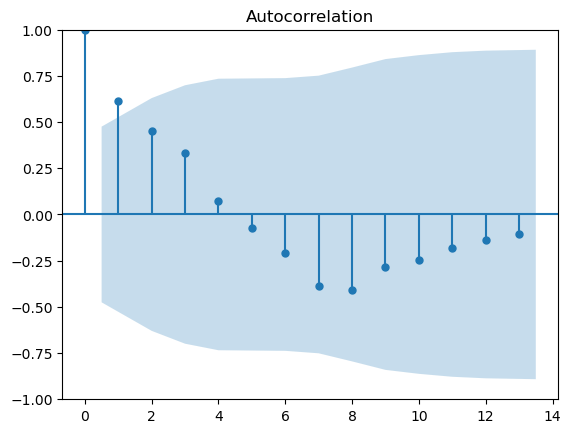

In [25]:
# Plot autocorrelation function (ACF)
plot_acf(Y)
plt.show()

Autokorelasi dapat didefinisikan sebagai adanya korelasi antar galat atau dapat terjadi ketika kovarians dan korelasi antar galat tidak sama dengan nol. Uji autokorelasi bertujuan untuk mengetahui apakah dalam suatu model regresi linier ada korelasi antar kesalahan pengganggu (residual = Ui) pada periode t dengan kesalahan pengganggu pada periode t-1 (periode sebelumnya) biasa disebut dengan lag. Jika gambarnya seperti diatas maka data yang kita miliki mengindikasikan terjadinya autokorelasi positif.

Namun terkadang akan sulit memahami sebuah plot grafik diatas, maka solusi analitik dapat menggunakan durbin watson.

## Uji Heteroskedastisitas

In [26]:
# Membuat model regresi dengan sm.add_constant
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
# Uji White untuk heteroskedastisitas
white_test = het_white(model.resid, X)
print("Uji Heteroskedastisitas (White Test):")
print("LM Statistic:", white_test[0])
print("LM p-value:", white_test[1])
print("F Statistic:", white_test[2])
print("F p-value:", white_test[3])

Uji Heteroskedastisitas (White Test):
LM Statistic: 5.973455368103073
LM p-value: 0.30881040302990387
F Statistic: 1.191815047101113
F p-value: 0.37381257833816395


Model regresi yang baik adalah yang homoskedastisitas atau tidak terjadi heteroskedastisitas. Uji heteroskedastisitas dilakukan dengan tujuan untuk menguji apakah terdapat ketidaksamaan variance maupun residual dari suatu pengamatan ke pengamatan lainnya.
Uji ini merupakan salah satu dari uji asumsi klasik yang harus dilakukan pada regresi linear. Apabila asumsi heteroskedastisitas tidak terpenuhi, maka model regresi dinyatakan tidak valid sebagai alat peramalan.
Dari uji diatas diperoleh

##### LM Statistic (Laguerrere and Multiplier Statistic) : 5.973455368103073
Ini adalah salah satu metrik yang digunakan untuk mengukur tingkat heteroskedastisitas dalam data atau model statistik. Semakin tinggi nilai LM Statistic, semakin besar indikasi heteroskedastisitas.
##### LM p-value : 0.30881040302990387
Nilai LM P-value adalah ukuran signifikansi statistik. Semakin kecil p-value, semakin kuat bukti bahwa heteroskedastisitas ada dalam data atau model statistik. Dalam hal ini, p-value cukup besar (lebih dari 0.05), yang berarti tidak ada cukup bukti untuk menolak hipotesis nol dengan kata lain tidak ada heteroskedastisitas.
##### F Statistic (Fisher Statistic) : 1.191815047101113
Nilai ini digunakan untuk mengukur tingkat heteroskedastisitas dalam data. Dalam konteks uji White, F Statistic digunakan untuk menguji apakah ada heteroskedastisitas dalam model regresi.
##### F p-value : 0.37381257833816395
Ini juga merupakan ukuran signifikansi dalam konteks pengujian heteroskedastisitas. Nilai p-value yang besar di sini juga menunjukkan bahwa tidak ada cukup bukti untuk menolak hipotesis nol atau tidak ada heteroskedastisitas.

Jadi kesimpulannya, LM Statistic adalah sekitar 5.97 dan LM p-value adalah sekitar 0.309, sedangkan F Statistic adalah sekitar 1.19 dan F p-value adalah sekitar 0.374. Karena kedua p-value ini lebih besar dari tingkat signifikansi biasa (0.05), kita tidak memiliki cukup bukti statistik untuk menolak hipotesis nol. Oleh karena itu, berdasarkan hasil uji White ini, kita dapat menyimpulkan bahwa tidak adanya heteroskedastisitas dalam model regresi tersebut dan kita dapat melanjutkan dengan keyakinan bahwa model regresi tersebut tidak terpengaruh oleh masalah heteroskedastisitas.


## Uji Multikolinearitas

In [27]:
# Menghitung VIF untuk setiap variabel independen
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Uji Multikolinearitas (VIF):")
print(vif)

Uji Multikolinearitas (VIF):
  Variable        VIF
0    const  19.725151
1       X1   2.618124
2       X2   2.618124


Model regresi yang baik tidak terjadi multikolinearitas. Uji multikolinearitas dilakukan untuk menguji apakah terdapat korelasi antar variabel bebas dalam model regresi. Jika terjadi multikolinearitas, maka sebuah variabel yang berkorelasi kuat dengan variabel lainnya di dalam model, kekuatan prediksinya tidak handal dan tidak stabil.

Berdasarkan nilai VIF yang diperoleh diatas:

• Variabel "const" memiliki VIF sekitar 19.725151. Ini adalah nilai yang tinggi, tetapi ini biasanya dapat diterima untuk variabel seperti konstanta (intercept) dalam model regresi. Variabel konstan seperti ini umumnya tidak perlu dianalisis untuk multikolinearitas karena mereka tidak terkait dengan variabel independen lainnya.

• Variabel "X1" dan "X2" masing-masing memiliki VIF sekitar 2.618124. Ini adalah nilai yang rendah dan menunjukkan bahwa korelasi antara "X1" dan "X2" dengan variabel independen lainnya sangat rendah. Oleh karena itu, model regresi diatas tidak mengalami multikolinearitas yang signifikan.

Kesimpulannya, model regresi diatas tidak mengalami multikolinearitas yang signifikan, dan kita dapat melanjutkan interpretasi hasil model dengan keyakinan bahwa variabel independen ("X1" dan "X2") relatif independen satu sama lain dalam model regresi.


## Algoritma Regresi dengan paket STATMODEL

In [28]:
# Membuat model regresi menggunakan statsmodels
model = sm.OLS(Y, X).fit()
print("Hasil Regresi dengan STATMODEL:")
print(model.summary())

Hasil Regresi dengan STATMODEL:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     24.91
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.45e-05
Time:                        00:15:48   Log-Likelihood:                -52.176
No. Observations:                  17   AIC:                             110.4
Df Residuals:                      14   BIC:                             112.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.715

C:\Users\AMELIAH UTARY\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=17



Hasil regresi diatas memberikan informasi tentang seberapa baik model ini menjelaskan hubungan antara variabel Y dengan X1 dan X2.
• R-squared (R-kuadrat), mengukur sejauh mana model statistik yang digunakan sesuai dengan data dengan berkisar antara 0 hingga 1. Semakin tinggi nilainya (0,781 dalam kasus ini), semakin baik model tersebut menjelaskan variasi dalam data. Dalam hal ini, sekitar 78,1% variasi dalam data dapat dijelaskan oleh model.

• Adj. R-squared (R-kuadrat disesuaikan) adalah versi yang dimodifikasi dari R-Squared yang nilainya hanya meningkat ketika variabel dalam model menambahkan nilai. Semakin banyak variabel yang tidak berguna dalam model, semakin rendah nilai Adjusted R-Squared, dan semakin tinggi nilai R-Squared. Oleh karena itu, nilai Adjusted R-Squared selalu lebih rendah daripada nilai R-Squared. Nilai yang diperoleh yaitu 0,749.

• F-statistic (Statistik F), Statistik F adalah alat untuk mengukur apakah semua faktor ini secara bersama-sama memiliki pengaruh yang signifikan pada penjualan. Jika nilainya tinggi, itu berarti model kita baik dalam menjelaskan penjualan. Jika nilainya rendah, model kita mungkin tidak sesuai dengan data dengan baik. Berdasarkan angka yang diperoleh yaitu 24,91 menunjukkan bahwa model ini secara signifikan menjelaskan variasi dalam data.

• Prob (F-statistic) adalah nilai probabilitas yang terkait dengan statistik F. Nilai Prob (F-statistic) yang diperoleh yaitu 2.45e-05, itu berarti bahwa kemungkinan model statistik yang digunakan sesuai dengan data. Dengan kata lain, hasil yang diperoleh tidak muncul secara acak. Probabilitas yang sangat rendah ini menunjukkan bahwa model statistik kita secara signifikan cocok dengan data dan variabel-variabel independen yang digunakan memiliki pengaruh yang signifikan dalam menjelaskan variabel dependen.

• Log-Likelihood, Nilai log-likelihood dari model regresi adalah cara untuk mengukur sejauh mana model cocok dengan data. Semakin tinggi nilai log-likelihood, semakin baik model tersebut cocok dengan dataset. Nilai log-likelihood untuk suatu model dapat berkisar dari negatif tak terhingga hingga positif tak terhingga. Nilai log-likelihood sebenarnya untuk suatu model tidak memiliki makna yang signifikan, tetapi berguna untuk membandingkan dua atau lebih model. Nilai yang diperoleh -52.176 dalam hal ini, model dianggap cukup baik dalam menjelaskan data yang digunakan.

• AIC (Akaike Information Criterion) adalah metrik yang digunakan untuk membandingkan model statistik yang berbeda dan membantu dalam pemilihan model yang paling sesuai dengan data. Semakin rendah nilai AIC, semakin baik modelnya dalam menggambarkan data dengan baik tanpa terlalu rumit. Nilai yang diperoleh yaitu 110.4 yang mengindikasikan bahwa model regresi relatif baik dalam menjelaskan data dengan mempertimbangkan tingkat kompleksitas model.

• BIC (Bayesian Information Criterion) adalah metrik yang digunakan untuk membandingkan dan mengevaluasi model statistik yang berbeda. Sama seperti AIC, BIC membantu dalam pemilihan model yang paling sesuai dengan data, dengan mempertimbangkan keseimbangan antara kecocokan model dengan data dan kompleksitas model. Dalam BIC, komponen yang mengukur kompleksitas model memiliki bobot yang lebih besar daripada AIC, sehingga BIC cenderung lebih menekankan model-model yang lebih sederhana. Model dengan nilai BIC yang lebih rendah dianggap lebih baik dalam memprediksi data dengan mempertimbangkan kompleksitas model. Nilai yang diperoleh yaitu 112.9 yang mengindikasikan bahwa model regresi relatif baik dalam menjelaskan data dengan mempertimbangkan tingkat kompleksitas model.

• Koefisien (coef) adalah angka-angka yang mengukur sejauh mana variabel independen memengaruhi variabel dependen dalam sebuah model regresi. Dalam konteks regresi, koefisien mengindikasikan seberapa besar atau seberapa kecil pengaruh variabel independen terhadap variabel dependen.

• Standard Error adalah ukuran variabilitas atau ketidakpastian dari suatu sampel statistik dalam mengestimasi parameter populasi. Secara umum, standard error digunakan untuk menentukan seberapa akurat suatu sampel dalam merepresentasikan populasi secara keseluruhan. Fungsi dari Standard Error adalah untuk memberikan informasi tentang seberapa dekat rata-rata sampel dengan rata-rata populasi. Semakin kecil nilai Standard Error, semakin akurat rata-rata sampel dalam merepresentasikan rata-rata populasi.
Dengan nilai standar error nya:
- Konstanta: 6.182
- X1: 0.141
- X2: 0.131

• T-statistic (t), Nilai t-statistic adalah rasio koefisien dengan kesalahan standarnya. Semakin besar nilai t, semakin signifikan koefisien tersebut. Dalam hal ini:
- Konstanta 	: 5.777
- X1 		: 3.219
- X2 		: 1.352

• P-value (P>|t|), mengukur signifikansi statistik dari masing-masing koefisien. P-value yang rendah menunjukkan bahwa koefisien tersebut signifikan secara statistik. Dalam hal ini, variabel Konstanta dan X1 memiliki p-value rendah, sementara X2 memiliki p-value yang lebih tinggi. Ini mengindikasikan bahwa variabel X2 mungkin tidak memberikan kontribusi yang signifikan terhadap model regresi, sementara variabel konstanta dan X1 memiliki pengaruh yang signifikan dalam menjelaskan variabilitas dalam data.

• Interval kepercayaan (0.025   0.975) dalam analisis regresi adalah rentang nilai yang digunakan untuk mengukur sejauh mana parameter regresi (seperti koefisien regresi) mungkin berkisar dalam populasi yang lebih besar dengan tingkat kepercayaan tertentu. Ini memberikan gambaran tentang seberapa pasti atau tidak pastinya kita tentang nilai parameter tersebut. Interval kepercayaan sering kali digunakan untuk mengukur seberapa yakin kita tentang seberapa besar atau kecil pengaruh variabel independen terhadap variabel dependen. Misalnya, kita mungkin memiliki interval kepercayaan 95% untuk koefisien regresi, yang berarti kita yakin dengan tingkat 95% bahwa nilai sebenarnya dari koefisien tersebut berada di dalam interval tersebut. Seperti pada hasil regresi diatas, kita menggunakan interval kepercayaan 95%.

• Omnibus adalah uji statistik yang digunakan untuk memeriksa apakah kesalahan dalam model statistik mengikuti pola tertentu. Hasil Omnibus dengan nilai rendah (0.003) menunjukkan bahwa kemungkinan besar kesalahan dalam model tidak mengikuti pola distribusi yang kita harapkan, yaitu distribusi normal. Namun, Prob(Omnibus) yang tinggi (0.999) menunjukkan bahwa hasil ini mungkin hanyalah kebetulan. Dengan kata lain, tidak memiliki signifikansi statistik yang kuat dan mungkin terjadi karena variasi acak dalam data.

• Skewness mengukur seberapa simetris atau tidak simetris distribusi kesalahan. Nilai mendekati nol (0.023) menandakan bahwa distribusi kesalahan hampir simetris, artinya tidak terlalu miring ke salah satu sisi.

• Kurtosis mengukur seberapa tajam atau datar puncak distribusi kesalahan. Nilai sekitar 2.499 menunjukkan bahwa puncak distribusi kesalahan agak datar dibandingkan dengan distribusi normal yang lebih tajam.

• Durbin-Watson, digunakan untuk menguji apakah ada keterkaitan antara pengukuran berurutan dalam data (autokorelasi) dalam model. Nilai sekitar 2.234 menunjukkan bahwa ada sedikit tanda-tanda autokorelasi positif dalam data.

• JB adalah hasil dari uji Jarque-Bera, yang digunakan untuk menguji apakah distribusi kesalahan dalam model statistik mengikuti distribusi normal. Nilai JB yang rendah (0.179) menunjukkan bahwa distribusi kesalahan mungkin mendekati distribusi normal. Nilai JB yang rendah menunjukkan kesalahan yang lebih mendekati normalitas.

• Prob(JB) adalah nilai probabilitas yang terkait dengan hasil JB. Probabilitas ini mengukur sejauh mana hasil JB mendekati distribusi chi-square. Dalam hal ini, Prob(JB) memiliki nilai yang sangat tinggi, yaitu 0.914. Probabilitas yang tinggi ini menunjukkan bahwa hasil JB mungkin terjadi secara kebetulan atau fluktuasi alami dalam data. Dengan kata lain, hasil JB yang diamati mungkin tidak cukup kuat untuk menyimpulkan bahwa distribusi kesalahan tidak mengikuti distribusi normal. Ini menunjukkan bahwa hasil JB tidak signifikan secara statistik pada tingkat signifikansi 0.05.

• Nilai Cond. No. yang tinggi, seperti 400, menunjukkan bahwa ada kemungkinan tingkat multikolinearitas yang tinggi dalam model regresi. Namun, jika Anda memiliki nilai multikolinearitas yang rendah (seperti yang diuji sebelumnya) untuk variabel konstanta, X1, dan X2, tetapi nilai Cond. No. yang tinggi (400), maka hal ini bisa menjadi situasi yang kurang umum. Mungkin ada variabel lain yang tidak dijelaskan dalam contoh sebelumnya yang menyebabkan nilai Cond. No. menjadi tinggi. Maka untuk memastikannya, saya menggunakan teknik analisis VIF (Variance Inflation Factor) untuk mengevaluasi multikolinearitas pada setiap variabel, dan hasilnya model regresi diatas tidak mengalami multikolinearitas yang signifikan.


## Menampilkan visual

Koefisien X1: 0.4531143249901129
Koefisien X2: 0.17698351544453655
Intercept: 35.715949580388525


C:\Users\AMELIAH UTARY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


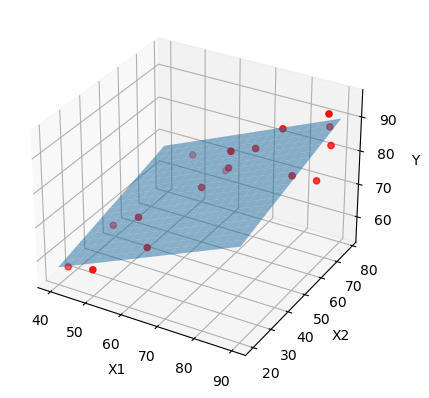

In [17]:
# Koefisien regresi
coef_x1 = regression_model.coef_[0]
coef_x2 = regression_model.coef_[1]
intercept = regression_model.intercept_

print(f'Koefisien X1: {coef_x1}')
print(f'Koefisien X2: {coef_x2}')
print(f'Intercept: {intercept}')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['X1'], df['X2'], df['Y'], c='r', marker='o')

# Prediksi hasil regresi untuk plot permukaan
x1_range = np.linspace(df['X1'].min(), df['X1'].max(), 20)
x2_range = np.linspace(df['X2'].min(), df['X2'].max(), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
y_pred = regression_model.predict(np.column_stack((x1_mesh.ravel(), x2_mesh.ravel())))
y_pred = y_pred.reshape(x1_mesh.shape)

ax.plot_surface(x1_mesh, x2_mesh, y_pred, alpha=0.5)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()

Bisa dilihat sejumlah titik merah tersebar di dalam gambar diatas. Masing-masing titik merah mewakili satu pengukuran dari variabel X1, X2, dan Y. Pikirkan mereka sebagai "titik" dalam grafik. Variabel X1 dan X2 ada di sisi horizontal, sedangkan variabel Y ada di sisi vertikal. Jadi, kita bisa melihat di mana titik-titik ini berada di dalam ruang.

Gambar diatas juga memiliki permukaan yang mengambang di atas titik-titik merah. Permukaan ini menunjukkan bagaimana model memprediksi nilai Y berdasarkan nilai X1 dan X2. Jadi, kita bisa melihat bagaimana model berusaha mengikuti tren dari titik-titik merah dan memprediksi nilai Y ketika kita memiliki nilai X1 dan X2 tertentu.

Jadi, secara keseluruhan, gambar tersebut mencoba memperlihatkan bagaimana model bekerja dalam menghubungkan X1, X2, dan Y dalam dunia tiga dimensi.  

## Menampilkan visual 3D

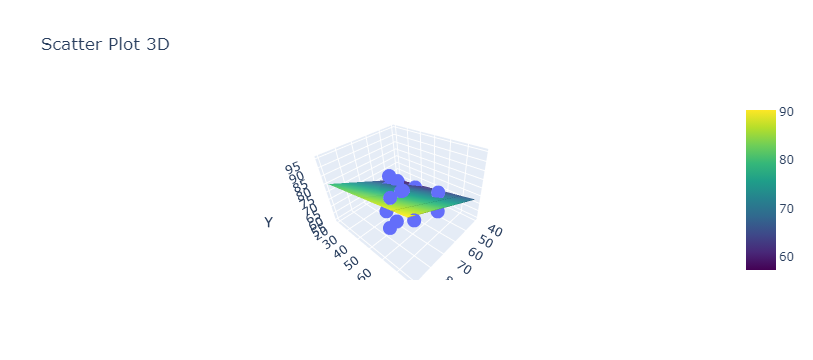

' from statsmodels.stats.diagnostic import het_breuschpagan\n\n_, p_value, _, _ = het_breuschpagan(model.resid, X)\nif p_value < 0.05:\n    print("Terdapat bukti heteroskedastisitas.")\nelse:\n    print("Tidak terdapat bukti heteroskedastisitas.") '

In [29]:
# Scatter plot untuk melihat hubungan antara X1, X2, dan Y
fig = px.scatter_3d(df, x='X1', y='X2', z='Y', title='Scatter Plot 3D')

# Regresi berganda sebagai bidang
xx, yy = np.meshgrid(df['X1'], df['X2'])
zz = model.params['const'] + model.params['X1'] * xx + model.params['X2'] * yy
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, opacity=0.8, colorscale='Viridis'))

fig.show()

''' from statsmodels.stats.diagnostic import het_breuschpagan

_, p_value, _, _ = het_breuschpagan(model.resid, X)
if p_value < 0.05:
    print("Terdapat bukti heteroskedastisitas.")
else:
    print("Tidak terdapat bukti heteroskedastisitas.") '''

Dari visualisasi diatas, kita memiliki titik-titik tiga dimensi (3D) yang mewakili data dari variabel X1, X2, dan Y. Setiap titik dalam grafik adalah titik data aktual Anda, dan posisinya menggambarkan nilai X1 dan X2 di sisi horizontal serta nilai Y di sisi vertikal. Kita dapat melihat sebaran data secara visual dalam bentuk titik-titik 3D.

Gambar diatas juga menampilkan permukaan yang melintang di atas titik-titik data. Permukaan ini merupakan hasil dari regresi berganda yang Anda lakukan. Ini adalah cara visual untuk menunjukkan bagaimana model regresi berusaha memodelkan hubungan antara variabel X1, X2, dan Y. Permukaan ini mencoba memprediksi nilai Y berdasarkan nilai-nilai X1 dan X2, dan menciptakan bidang 3D yang menunjukkan perkiraan hasil dari model.